In [1]:
import sys
import numpy
import pandas
import xgboost
import lightgbm
import sklearn
import matplotlib
import imblearn
import hyperopt

print('python :', sys.version)
print('numpy :', numpy.__version__)
print('pandas :', pandas.__version__)
print('scikit-learn :', sklearn.__version__)
print('lightgbm :', lightgbm.__version__)
print('xgboost :', xgboost.__version__)
print('matplotlib :', matplotlib.__version__)
print('imblearn :', imblearn.__version__)
print('hyperopt :', hyperopt.__version__)

python : 3.9.15 | packaged by conda-forge | (main, Nov 22 2022, 08:52:10) 
[Clang 14.0.6 ]
numpy : 1.23.5
pandas : 2.2.3
scikit-learn : 1.0.2
lightgbm : 3.3.5
xgboost : 1.6.1
matplotlib : 3.9.2
imblearn : 0.12.3
hyperopt : 0.2.7


# 📍📍 train + test

In [2]:
import pandas as pd
import numpy as np

train = pd.read_csv('/Users/pycode/1_project/데이터/train.csv')
train.info()
train.head()
# train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2452 non-null   object 
 1   매물확인방식  2452 non-null   object 
 2   보증금     2452 non-null   float64
 3   월세      2452 non-null   int64  
 4   전용면적    1665 non-null   float64
 5   해당층     2223 non-null   float64
 6   총층      2436 non-null   float64
 7   방향      2452 non-null   object 
 8   방수      2436 non-null   float64
 9   욕실수     2434 non-null   float64
 10  주차가능여부  2452 non-null   object 
 11  총주차대수   1756 non-null   float64
 12  관리비     2452 non-null   int64  
 13  중개사무소   2452 non-null   object 
 14  제공플랫폼   2452 non-null   object 
 15  게재일     2452 non-null   object 
 16  허위매물여부  2452 non-null   int64  
dtypes: float64(7), int64(3), object(7)
memory usage: 325.8+ KB


,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1


In [3]:

test = pd.read_csv('/Users/pycode/1_project/데이터/test.csv')
test.info()
test.head()
test.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      613 non-null    object 
 1   매물확인방식  613 non-null    object 
 2   보증금     613 non-null    float64
 3   월세      613 non-null    int64  
 4   전용면적    429 non-null    float64
 5   해당층     563 non-null    float64
 6   총층      611 non-null    float64
 7   방향      613 non-null    object 
 8   방수      611 non-null    float64
 9   욕실수     611 non-null    float64
 10  주차가능여부  613 non-null    object 
 11  총주차대수   438 non-null    float64
 12  관리비     613 non-null    int64  
 13  중개사무소   613 non-null    object 
 14  제공플랫폼   613 non-null    object 
 15  게재일     613 non-null    object 
dtypes: float64(7), int64(2), object(7)
memory usage: 76.8+ KB


ID          0
매물확인방식      0
보증금         0
월세          0
전용면적      184
해당층        50
총층          2
방향          0
방수          2
욕실수         2
주차가능여부      0
총주차대수     175
관리비         0
중개사무소       0
제공플랫폼       0
게재일         0
dtype: int64

## 📍 데이터 타입 지정
* train, test 합치기 전에 데이터 타입 지정   
train -> 데이터타입 : 'train'    
test -> 데이터타입 : 'test' 
* concat으로 train + test

In [4]:
train['데이터타입'] = 'train'
test['데이터타입'] = 'test'
total_data = pd.concat([train.drop(columns='허위매물여부'), test])

total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3065 entries, 0 to 612
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      3065 non-null   object 
 1   매물확인방식  3065 non-null   object 
 2   보증금     3065 non-null   float64
 3   월세      3065 non-null   int64  
 4   전용면적    2094 non-null   float64
 5   해당층     2786 non-null   float64
 6   총층      3047 non-null   float64
 7   방향      3065 non-null   object 
 8   방수      3047 non-null   float64
 9   욕실수     3045 non-null   float64
 10  주차가능여부  3065 non-null   object 
 11  총주차대수   2194 non-null   float64
 12  관리비     3065 non-null   int64  
 13  중개사무소   3065 non-null   object 
 14  제공플랫폼   3065 non-null   object 
 15  게재일     3065 non-null   object 
 16  데이터타입   3065 non-null   object 
dtypes: float64(7), int64(2), object(8)
memory usage: 431.0+ KB


## 📍 train + test 후 파생변수 생성
* 미기재
* 방치일수
* 집세

In [5]:
import datetime

# 미기재
total_data['미기재'] = total_data.isna().sum(axis=1)

# 방치일수
last = datetime.datetime.strptime(total_data['게재일'].max(), "%Y-%m-%d").date()
today = last + datetime.timedelta(days=1)

def get_delta_day(date):
    delta = today - datetime.datetime.strptime(date, "%Y-%m-%d").date()
    return delta.days

total_data['방치일수'] = total_data['게재일'].apply(lambda x: get_delta_day(x))

# 집세
total_data['집세'] = total_data['관리비'] * 10000 + total_data['월세']

total_data.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,데이터타입,미기재,방치일수,집세
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,train,2,146,1430000
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,train,2,68,200000
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,train,2,96,380000
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,train,0,98,130000
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,train,2,252,530000


## 📍 train + test 후 결측치 처리

### 1. 방수, 욕실수   
  -> 가장 많은 수인 1로 채움

In [6]:
room = total_data['방수'].value_counts()
bath = total_data['욕실수'].value_counts()
print(room)
print(bath)

total_data[['방수', '욕실수']] = total_data[['방수', '욕실수']].fillna(1.0)

방수
1.0    1881
2.0    1166
Name: count, dtype: int64
욕실수
1.0    2940
2.0     105
Name: count, dtype: int64


### 2. 전용면적   
  -> 방수, 욕실수 조합으로 전용면적 평균 및 적용

In [7]:
dropna_total = total_data.dropna(subset=['전용면적'], how='any', axis=0)
new_data = pd.DataFrame(dropna_total, columns=('방수', '욕실수', '전용면적'))

mean_data = new_data.groupby(['방수', '욕실수'], as_index=False).mean()
print(mean_data)

for index, row in total_data.iterrows():
    if (pd.isna(row['전용면적'])):
        filterTrain = mean_data[(mean_data['방수'] == row['방수']) & (mean_data['욕실수'] == row['욕실수'])]
        total_data.at[index, '전용면적'] = filterTrain['전용면적'].values[0]

total_data.head()

    방수  욕실수       전용면적
0  1.0  1.0  25.160408
1  2.0  1.0  32.201518
2  2.0  2.0  26.756931


,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,데이터타입,미기재,방치일수,집세
0,TRAIN_0000,현장확인,402500000.0,470000,25.160408,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,train,2,146,1430000
1,TRAIN_0001,현장확인,170500000.0,200000,32.201518,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,train,2,68,200000
2,TRAIN_0002,전화확인,114000000.0,380000,25.160408,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,train,2,96,380000
3,TRAIN_0003,현장확인,163500000.0,30000,36.300000,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,train,0,98,130000
4,TRAIN_0004,현장확인,346000000.0,530000,32.201518,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,train,2,252,530000


### 3. 해당층, 총층   
  -> 평균을 반올림하여 적용

In [8]:
room = round(total_data['해당층'].mean())
bath = round(total_data['총층'].mean())
print(room)
print(bath)
total_data['해당층'] = total_data['해당층'].fillna(room)
total_data['총층'] = total_data['총층'].fillna(bath)

total_data.isna().sum()

5
8


ID          0
매물확인방식      0
보증금         0
월세          0
전용면적        0
해당층         0
총층          0
방향          0
방수          0
욕실수         0
주차가능여부      0
총주차대수     871
관리비         0
중개사무소       0
제공플랫폼       0
게재일         0
데이터타입       0
미기재         0
방치일수        0
집세          0
dtype: int64

### 4. 총주차대수
-> 평균을 반올림하여 적용

In [9]:
parking = round(total_data['총주차대수'].mean())
total_data['총주차대수'] = total_data['총주차대수'].fillna(parking)

## 📍 보증금, 월세, 관리비 단위 정리

In [10]:
total_data['보증금'] = total_data['보증금'] / 10000
total_data['월세'] = total_data['월세'] / 10000
total_data['집세'] = total_data['집세'] / 10000
# total_data['관리비'] = total_data['관리비'] * 10000
total_data.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,데이터타입,미기재,방치일수,집세
0,TRAIN_0000,현장확인,40250.0,47.0,25.160408,5.0,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,train,2,146,143.0
1,TRAIN_0001,현장확인,17050.0,20.0,32.201518,3.0,4.0,남동향,2.0,1.0,불가능,20.0,0,q39iV5J4E6,D플랫폼,2024-12-26,train,2,68,20.0
2,TRAIN_0002,전화확인,11400.0,38.0,25.160408,2.0,3.0,동향,1.0,1.0,불가능,20.0,0,b03oE4G3F6,A플랫폼,2024-11-28,train,2,96,38.0
3,TRAIN_0003,현장확인,16350.0,3.0,36.300000,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,train,0,98,13.0
4,TRAIN_0004,현장확인,34600.0,53.0,32.201518,3.0,3.0,동향,2.0,1.0,불가능,20.0,0,N45gM0M7R0,B플랫폼,2024-06-25,train,2,252,53.0


---------------

# 📍📍 Encoding
-> 레이블 인코딩 (Label encoding) 사용

In [11]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['매물확인방식', '방향', '주차가능여부', '중개사무소', '제공플랫폼']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF

total_data_encoded = encode_features(total_data)
total_data_encoded.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,데이터타입,미기재,방치일수,집세
0,TRAIN_0000,2,40250.0,47.0,25.160408,5.0,15.0,7,1.0,1.0,0,40.0,96,256,1,2024-10-09,train,2,146,143.0
1,TRAIN_0001,2,17050.0,20.0,32.201518,3.0,4.0,0,2.0,1.0,1,20.0,0,240,3,2024-12-26,train,2,68,20.0
2,TRAIN_0002,1,11400.0,38.0,25.160408,2.0,3.0,3,1.0,1.0,1,20.0,0,157,0,2024-11-28,train,2,96,38.0
3,TRAIN_0003,2,16350.0,3.0,36.300000,3.0,9.0,0,2.0,1.0,0,13.0,10,32,0,2024-11-26,train,0,98,13.0
4,TRAIN_0004,2,34600.0,53.0,32.201518,3.0,3.0,3,2.0,1.0,1,20.0,0,76,1,2024-06-25,train,2,252,53.0


# 📍📍 Feature Scaling
-> MinMaxScaler 사용

In [12]:
# from sklearn.preprocessing import MinMaxScaler

# # MinMaxScaler객체 생성
# scaler = MinMaxScaler()
# # MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
# cols_for_scale = ['보증금', '월세', '전용면적', '해당층', '총층', '방수', '욕실수', '총주차대수', '관리비', '미기재', '방치일수', '집세']
# scaler.fit(total_data_encoded[cols_for_scale])
# total_data_encoded[cols_for_scale] = scaler.transform(total_data_encoded[cols_for_scale])

# # transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
# total_data_scaled = pd.DataFrame(data=total_data_encoded, columns=total_data_encoded.columns)
# print('feature들의 최솟값')
# print(total_data_scaled.min())
# print('\nfeature들의 최댓값')
# print(total_data_scaled.max())
# total_data_scaled.head()

# 📍📍 train, test 데이터 분리

In [13]:
total_data_prepro = total_data_encoded
# total_data_prepro = total_data_scaled
train_data = total_data_prepro[total_data_prepro['데이터타입'] == 'train']
test_data = total_data_prepro[total_data_prepro['데이터타입'] == 'test']

train_data["허위매물여부"] = train.set_index("ID").loc[train_data["ID"], "허위매물여부"].values

# train_data_mo = train_data.drop(columns=['ID', '게재일', '데이터타입', '해당층', '미기재', '방향', '매물확인방식', '방수'])
# test_data_mo = test_data.drop(columns=['ID', '게재일', '데이터타입', '해당층', '미기재', '방향', '매물확인방식', '방수'])
# train_data_mo = train_data.drop(columns=['ID', '게재일', '데이터타입', '총층', '주차가능여부', '제공플랫폼', '해당층', '미기재', '방향', '매물확인방식', '방수'])
# test_data_mo = test_data.drop(columns=['ID', '게재일', '데이터타입', '총층', '주차가능여부', '제공플랫폼', '해당층', '미기재', '방향', '매물확인방식', '방수'])
train_data_mo = train_data.drop(columns=['ID', '게재일', '데이터타입'])
test_data_mo = test_data.drop(columns=['ID', '게재일', '데이터타입'])
print(train_data_mo.head())
print(test_data_mo.head())

   매물확인방식      보증금    월세       전용면적  해당층    총층  방향   방수  욕실수  주차가능여부  총주차대수  \
0       2  40250.0  47.0  25.160408  5.0  15.0   7  1.0  1.0       0   40.0   
1       2  17050.0  20.0  32.201518  3.0   4.0   0  2.0  1.0       1   20.0   
2       1  11400.0  38.0  25.160408  2.0   3.0   3  1.0  1.0       1   20.0   
3       2  16350.0   3.0  36.300000  3.0   9.0   0  2.0  1.0       0   13.0   
4       2  34600.0  53.0  32.201518  3.0   3.0   3  2.0  1.0       1   20.0   

   관리비  중개사무소  제공플랫폼  미기재  방치일수     집세  허위매물여부  
0   96    256      1    2   146  143.0       0  
1    0    240      3    2    68   20.0       0  
2    0    157      0    2    96   38.0       0  
3   10     32      0    0    98   13.0       0  
4    0     76      1    2   252   53.0       1  
   매물확인방식      보증금    월세       전용면적  해당층    총층  방향   방수  욕실수  주차가능여부  총주차대수  \
0       0  22300.0  53.0  25.160408  5.0   5.0   2  1.0  1.0       1   20.0   
1       0  15050.0  59.0  32.201518  7.0  11.0   7  1.0  1.0       1   16

/var/folders/vf/7_3tcw7s7l1cqg5rdfjpnwf00000gn/T/ipykernel_58178/3672584324.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["허위매물여부"] = train.set_index("ID").loc[train_data["ID"], "허위매물여부"].values


-----------------

In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# 3장 내용
def get_clf_eval(y_test, pred, pred_probs):
   confusion = confusion_matrix(y_test, pred)
   accuracy = accuracy_score(y_test, pred)
   precision = precision_score(y_test, pred)
   recall = recall_score(y_test, pred)
   f1 = f1_score(y_test, pred)
   # ROC-AUC
   roc_auc = roc_auc_score(y_test, pred_probs)
   print('오차 행렬')
   print(confusion)
   # ROc-AUC
   print('정확도 : {:.4f}, 정밀도 : {:.4f}, 재현율 : {:.4f},\
   F1 : {:.4f}, AUC : {:.4f}'.format(accuracy,precision,recall,f1,roc_auc))
   
# get_clf_eval(y_test, pred, pred_probs)

# 📍📍 XGBoost

In [15]:
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

from matplotlib import rc
rc('font', family='AppleGothic')

## 📍 파이썬 래퍼

In [16]:
import xgboost as xgb

X_train = train_data_mo.iloc[:, :-1]
y_train = train_data_mo.iloc[:, -1]

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

print(X_tr.shape , X_val.shape)

(2206, 17) (246, 17)


In [17]:
X_test = test_data_mo.iloc[:, :]
# y_test = test_data_mo.iloc[:, -1]

dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test)

params = { 'max_depth':3,
        'eta': 0.05,
        'objective':'binary:logistic',
        'eval_metric':'logloss'
    }
num_rounds = 400

eval_list = [(dtr,'train'),(dval,'eval')]

xgb_model = xgb.train(params = params , dtrain=dtr , num_boost_round=num_rounds , early_stopping_rounds=50, evals=eval_list )

[0]	train-logloss:0.65314	eval-logloss:0.65024
[1]	train-logloss:0.61682	eval-logloss:0.61167
[2]	train-logloss:0.58381	eval-logloss:0.57657
[3]	train-logloss:0.55365	eval-logloss:0.54454
[4]	train-logloss:0.52609	eval-logloss:0.51487
[5]	train-logloss:0.50070	eval-logloss:0.48786
[6]	train-logloss:0.47738	eval-logloss:0.46275
[7]	train-logloss:0.45578	eval-logloss:0.43992
[8]	train-logloss:0.43591	eval-logloss:0.41848
[9]	train-logloss:0.41739	eval-logloss:0.39890
[10]	train-logloss:0.40027	eval-logloss:0.38087
[11]	train-logloss:0.38422	eval-logloss:0.36401
[12]	train-logloss:0.36932	eval-logloss:0.34794
[13]	train-logloss:0.35539	eval-logloss:0.33350
[14]	train-logloss:0.34237	eval-logloss:0.31977
[15]	train-logloss:0.33003	eval-logloss:0.30704
[16]	train-logloss:0.31868	eval-logloss:0.29453
[17]	train-logloss:0.30804	eval-logloss:0.28339
[18]	train-logloss:0.29772	eval-logloss:0.27297
[19]	train-logloss:0.28827	eval-logloss:0.26293
[20]	train-logloss:0.27934	eval-logloss:0.25363
[2

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

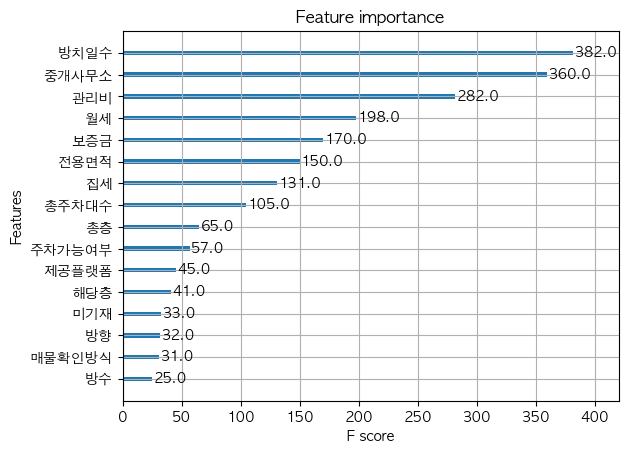

In [18]:
plot_importance(xgb_model)

## 📍 사이킷런 래퍼

In [31]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, early_stopping_rounds=50, eval_metric='logloss')
# {'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 400}
# xgb_wrapper = XGBClassifier(n_estimators=500, learning_rate=0.02, max_depth=5, early_stopping_rounds=50, eval_metric='logloss')
evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, eval_set=evals)

[0]	validation_0-logloss:0.65314	validation_1-logloss:0.65024
[1]	validation_0-logloss:0.61682	validation_1-logloss:0.61167
[2]	validation_0-logloss:0.58381	validation_1-logloss:0.57657


[3]	validation_0-logloss:0.55365	validation_1-logloss:0.54454
[4]	validation_0-logloss:0.52609	validation_1-logloss:0.51487
[5]	validation_0-logloss:0.50070	validation_1-logloss:0.48786
[6]	validation_0-logloss:0.47738	validation_1-logloss:0.46275
[7]	validation_0-logloss:0.45578	validation_1-logloss:0.43992
[8]	validation_0-logloss:0.43591	validation_1-logloss:0.41848
[9]	validation_0-logloss:0.41739	validation_1-logloss:0.39890
[10]	validation_0-logloss:0.40027	validation_1-logloss:0.38087
[11]	validation_0-logloss:0.38422	validation_1-logloss:0.36401
[12]	validation_0-logloss:0.36932	validation_1-logloss:0.34794
[13]	validation_0-logloss:0.35539	validation_1-logloss:0.33350
[14]	validation_0-logloss:0.34237	validation_1-logloss:0.31977
[15]	validation_0-logloss:0.33003	validation_1-logloss:0.30704
[16]	validation_0-logloss:0.31868	validation_1-logloss:0.29453
[17]	validation_0-logloss:0.30804	validation_1-logloss:0.28339
[18]	validation_0-logloss:0.29772	validation_1-logloss:0.27297

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=50, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=3, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, ...)

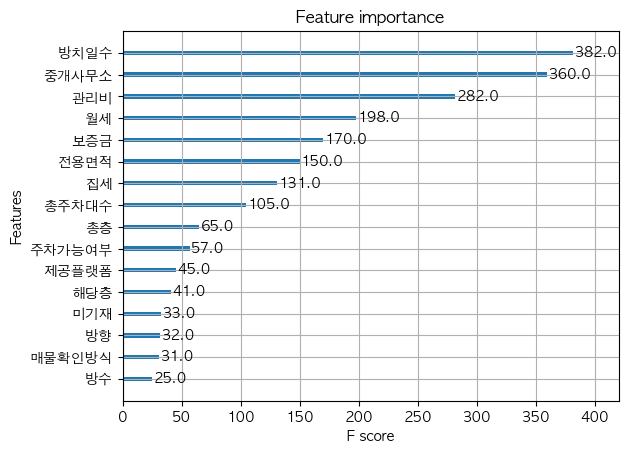

In [20]:
# fig, ax = plt.subplots(figsize=(10, 12))

# plot_importance(xgb_wrapper, ax=ax)
plot_importance(xgb_wrapper)
plt.show()

In [21]:

ws50_preds = xgb_wrapper.predict(X_test)
ws50_preds_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

len(ws50_preds)
test_data['ID']

df = pd.concat([pd.Series(test_data['ID'], name="ID"), pd.DataFrame(ws50_preds, columns=["허위매물여부"])], axis=1)
print(df)

# df.to_csv("/Users/pycode/1_project/output_xgboost.csv", index = False)

           ID  허위매물여부
0    TEST_000       0
1    TEST_001       0
2    TEST_002       1
3    TEST_003       0
4    TEST_004       0
..        ...     ...
608  TEST_608       0
609  TEST_609       0
610  TEST_610       0
611  TEST_611       0
612  TEST_612       0

[613 rows x 2 columns]


### ROC 곡선 함수

In [22]:
from sklearn.metrics import roc_curve, auc

def get_roc_curve(model, X_test, y_test):
    # 예측 확률 계산
    y_scores = model.predict_proba(X_test)[:, 1]

    # ROC 곡선 계산
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)

    # AUC 계산
    roc_auc = auc(fpr, tpr)

    # ROC 곡선 그리기
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, label='STR')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

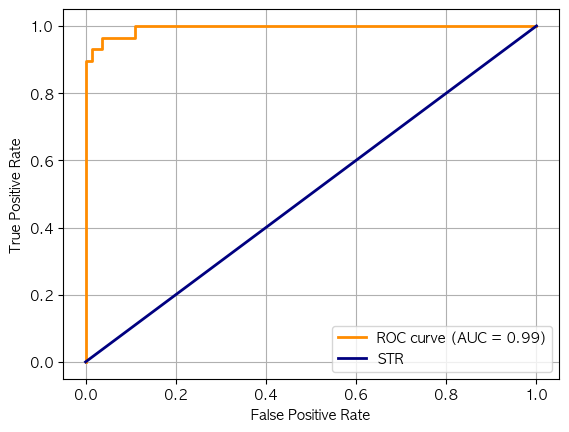

In [23]:
get_roc_curve(xgb_wrapper, X_val, y_val)

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# 3장 내용
def get_clf_eval(y_test, pred, pred_probs):
   confusion = confusion_matrix(y_test, pred)
   accuracy = accuracy_score(y_test, pred)
   precision = precision_score(y_test, pred)
   recall = recall_score(y_test, pred)
   f1 = f1_score(y_test, pred)
   # ROC-AUC
   roc_auc = roc_auc_score(y_test, pred_probs)
   print('오차 행렬')
   print(confusion)
   print()
   
   # ROc-AUC
   print('정확도 : {:.4f}, 정밀도 : {:.4f}, 재현율 : {:.4f}'.format(accuracy,precision,recall))
   print('F1 : {:.4f}, AUC : {:.4f}'.format(f1,roc_auc))

In [25]:

preds = xgb_wrapper.predict(X_val)
pred_proba = xgb_wrapper.predict_proba(X_val)[:, 1]

get_clf_eval(y_val, preds, pred_proba)

오차 행렬
[[215   2]
 [  3  26]]

정확도 : 0.9797, 정밀도 : 0.9286, 재현율 : 0.8966
F1 : 0.9123, AUC : 0.9944


# 📍📍 LightGBM

In [36]:
from lightgbm import LGBMClassifier

# lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05, early_stopping_rounds=50)
# lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05, early_stopping_rounds=50, is_unbalance=True)
# lgbm_wrapper = LGBMClassifier(n_estimators=400, scale_pos_weight=7.23, learning_rate=0.05, early_stopping_rounds=50)
# lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05, early_stopping_rounds=50, lambda_l1=0.1)
# lgbm_wrapper = LGBMClassifier(n_estimators=300, learning_rate=0.02, early_stopping_rounds=50, max_depth=4, lambda_l1=0, lambda_l2=0.1)
# {'lambda_l1': 0, 'lambda_l2': 0.1, 'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 300}

# evals = [(X_tr, y_tr), (X_val, y_val)]

# lgbm_wrapper.fit(X_tr, y_tr, eval_set=evals, eval_metric="logloss")
# preds = lgbm_wrapper.predict(X_test)
# pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[1]	training's binary_logloss: 0.329135	valid_1's binary_logloss: 0.323833
[2]	training's binary_logloss: 0.299879	valid_1's binary_logloss: 0.298054
[3]	training's binary_logloss: 0.277217	valid_1's binary_logloss: 0.276843
[4]	training's binary_logloss: 0.258622	valid_1's binary_logloss: 0.259826
[5]	training's binary_logloss: 0.242924	valid_1's binary_logloss: 0.245439
[6]	training's binary_logloss: 0.229414	valid_1's binary_logloss: 0.232959
[7]	training's binary_logloss: 0.217524	valid_1's binary_logloss: 0.222287
[8]	training's binary_logloss: 0.207093	valid_1's binary_logloss: 0.212005
[9]	training's binary_logloss: 0.197827	valid_1's binary_logloss: 0.203652
[10]	training's binary_logloss: 0.189185	valid_1's binary_logloss: 0.195178
[11]	training's binary_logloss: 0.181629	valid_1's binary_logloss: 0.187775
[12]	training's binary_logloss: 0.17464

In [38]:
lgbm_wrapper = LGBMClassifier(
    n_estimators=400, 
    learning_rate=0.05,
    max_depth=6,
    num_leaves=31,
    min_data_in_leaf=20,
    lambda_l1=1.0,
    lambda_l2=1.0,
    min_gain_to_split=0.1,
    bagging_fraction=0.8,
    bagging_freq=5,
    feature_fraction=0.8,
    scale_pos_weight=7.23,  # 클래스 불균형 대응 (직접 계산해서 적용)
    early_stopping_rounds=50
)

evals = [(X_tr, y_tr), (X_val, y_val)]

lgbm_wrapper.fit(X_tr, y_tr, eval_set=evals, eval_metric="logloss")
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[1]	training's binary_logloss: 0.334803	valid_1's binary_logloss

In [27]:
# get_roc_curve(lgbm_wrapper, X_val, y_val)

In [28]:

preds = lgbm_wrapper.predict(X_val)
pred_proba = lgbm_wrapper.predict_proba(X_val)[:, 1]

# get_clf_eval(y_val, preds, pred_proba)

In [37]:

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

len(preds)
# test_data['ID']

df = pd.concat([pd.Series(test_data['ID'], name="ID"), pd.DataFrame(preds, columns=["허위매물여부"])], axis=1)
print(df)

# print(test_data)

df.to_csv("/Users/pycode/1_project/output_lgbm_unbalanced.csv", index = False)

           ID  허위매물여부
0    TEST_000       0
1    TEST_001       0
2    TEST_002       1
3    TEST_003       0
4    TEST_004       0
..        ...     ...
608  TEST_608       0
609  TEST_609       0
610  TEST_610       0
611  TEST_611       0
612  TEST_612       0

[613 rows x 2 columns]
